In [49]:
import kagglehub
import os

path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

curr_path_img =  "/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS"
curr_path1 = curr_path_img + "/datasets"
# os.chmod(curr_path1, 777)

print("Path to dataset files:", path, curr_path1)

!cp -R $path/. $curr_path1/

Path to dataset files: /Users/sara/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2 /Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets


In [2]:
import splitfolders # or import splitfolders
input_folder = "/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/"
output = "/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.64, .16, .2))

Copying files: 2189 files [00:00, 2260.72 files/s]


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
train_path=curr_path1 + "/train"
test_path=curr_path1 + "/test"
val_path=curr_path1 + "/val"

In [15]:
x_train=[]

print(train_path)
for folder in os.listdir(train_path):
    print(train_path,folder)
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/train
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/train paper
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/train rock
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/train scissors


In [16]:
x_test=[]

print(test_path)
for folder in os.listdir(test_path):
    print(test_path,folder)
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/test
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/test paper
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/test rock
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/test scissors


In [17]:
x_val=[]

print(val_path)
for folder in os.listdir(val_path):
    print(val_path,folder)
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/val
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/val paper
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/val rock
/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS/datasets/val scissors


In [18]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [19]:
train_x.shape,test_x.shape,val_x.shape

((1399, 224, 224, 3), (440, 224, 224, 3), (349, 224, 224, 3))

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1399 images belonging to 3 classes.
Found 440 images belonging to 3 classes.
Found 349 images belonging to 3 classes.


In [22]:
train_y=training_set.classes

In [23]:
test_y=test_set.classes

In [24]:

val_y=val_set.classes

In [25]:
training_set.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [26]:
train_y.shape,test_y.shape,val_y.shape

((1399,), (440,), (349,))

In [27]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [28]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [29]:
x = Flatten()(vgg.output)

#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [30]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,651 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [31]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [33]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 244s 6s/step - accuracy: 0.8252 - loss: 2.2479 - val_accuracy: 0.9885 - val_loss: 0.1577
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 0.9993 - loss: 0.0086 - val_accuracy: 0.9914 - val_loss: 0.1092
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 263s 6s/step - accuracy: 0.9962 - loss: 0.0084 - val_accuracy: 0.9971 - val_loss: 0.1136
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 261s 6s/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9971 - val_loss: 0.0909
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 256s 6s/step - accuracy: 1.0000 - loss: 1.8386e-04 - val_accuracy: 0.9971 - val_loss: 0.0991
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 332s 8s/step - accuracy: 1.0000 - loss: 5.0073e-08 - val_accuracy: 0.9971 - val_loss: 0.0976
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 258s 6s/step - accuracy: 1.0000 - loss: 7.9613e-09 - val_accuracy: 0.9971 - val_loss: 0.0976
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 1.0000 - loss: 3.1144e-08 - val_accu

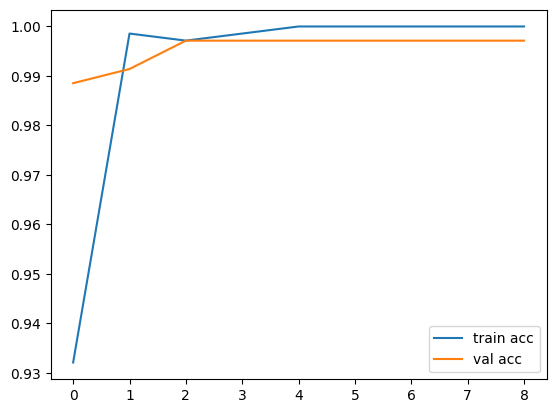

In [34]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

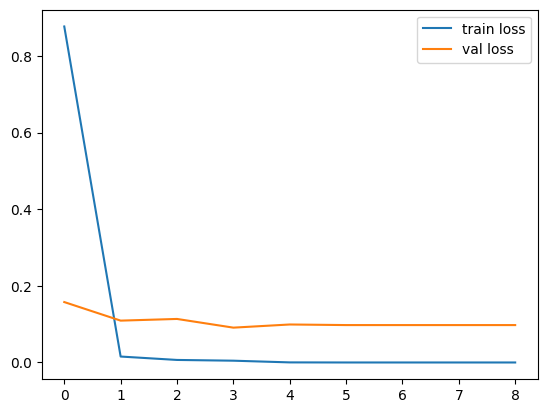

In [35]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [36]:
model.evaluate(test_x,test_y,batch_size=32)

14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 1.0000 - loss: 3.1333e-04


[0.00045558801502920687, 1.0]

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

accuracy_score(y_pred,test_y)

14/14 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step


1.0

In [38]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       150

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



In [39]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[144   0   0]
 [  0 146   0]
 [  0   0 150]]


In [41]:
# path="rps-results"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("Paper")
    elif pred[0][1]>0.5:
        print("Rock")
    elif pred[0][2]>0.5:
        print("Scissors")
    else:
        print("Unknown")

FileNotFoundError: [Errno 2] No such file or directory: 'rps-results'

In [42]:
model.save("vgg-rps-final.h5")

In [45]:
from tensorflow.keras.models import load_model
model=load_model("vgg-rps-final.h5")

/Users/sara/Documents/GitHub/implementations/14_ImgClassification_RPS
nXOxF15xZFtfflkL.png


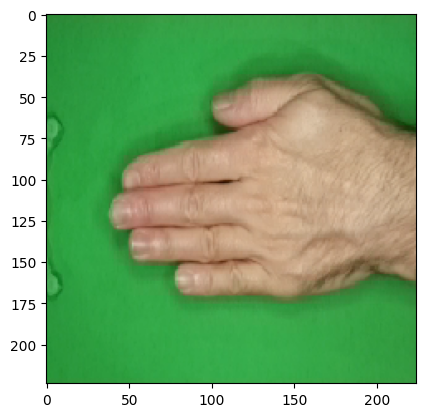

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Paper
CxcQ3XRBjkkmZ9b8.png


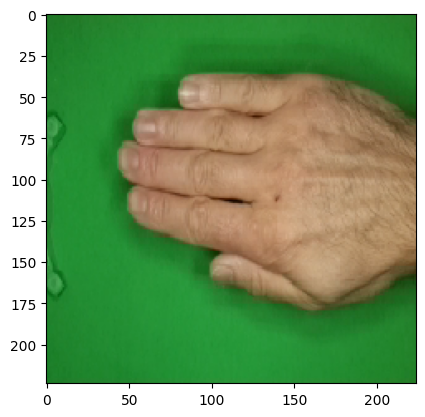

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Paper
2SldJqjiZwIVPef9.png


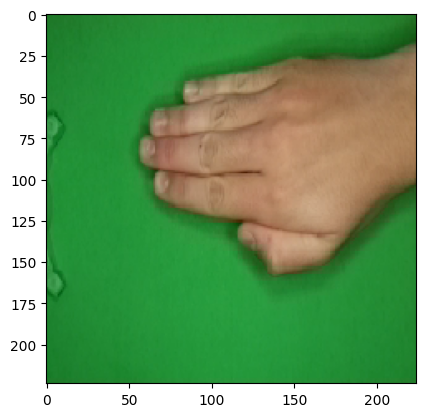

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Paper
xJAZ3PewpLYs4ogR.png


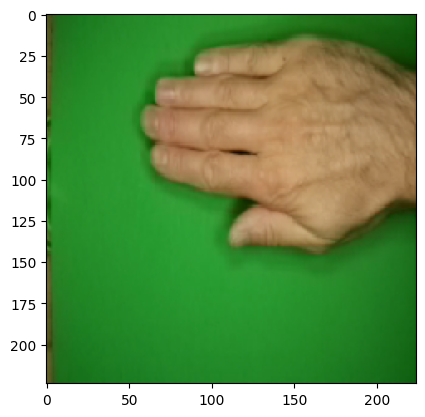

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Paper
zQvuYPyUR7gXdqXE.png


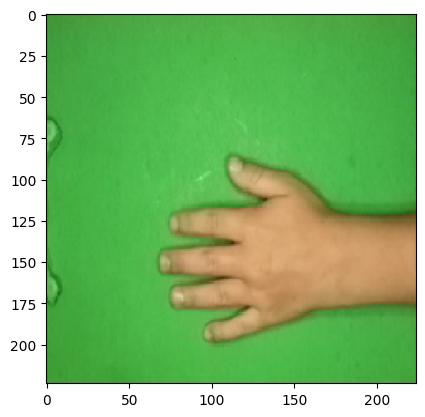

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Rock
rDfjA9TE0tYqzT21.png


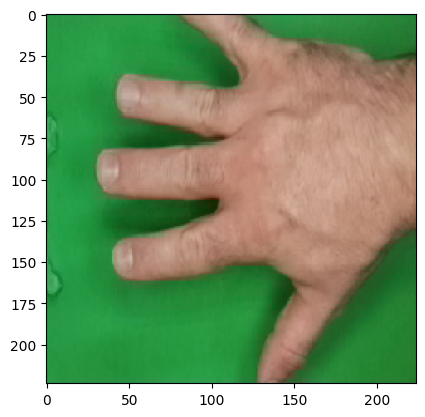

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Paper
SDQQfzHl47yNqA6K.png


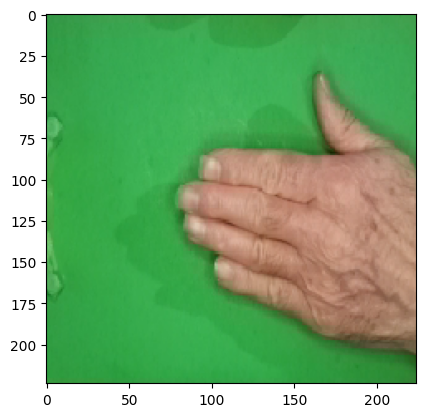

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Paper
hHY3BbYoVFjLEsbd.png


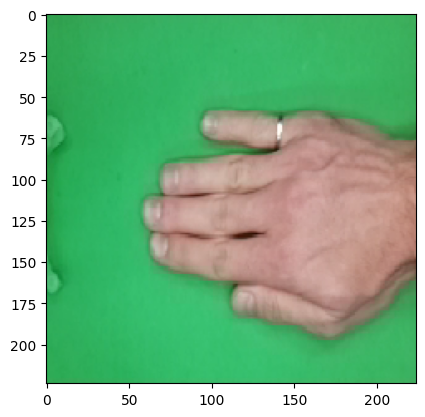

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Paper
pVCqrp8S6Ze3DAI8.png


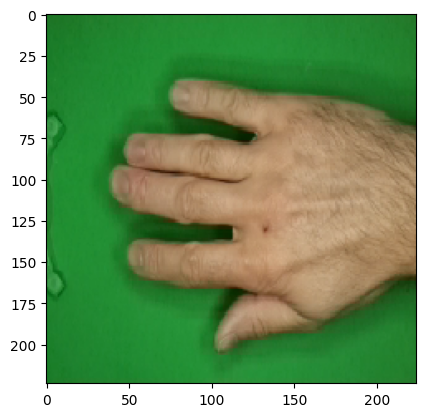

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Paper
MmzlgKI366LYX3fe.png


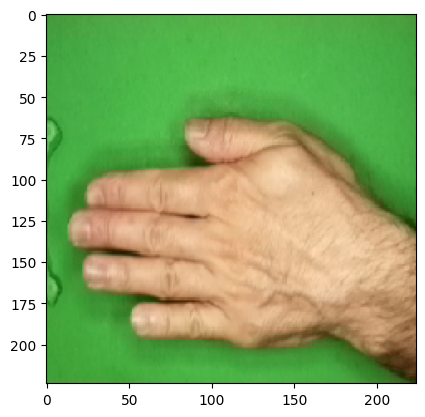

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Paper
JsryGUQahbbNkrlP.png


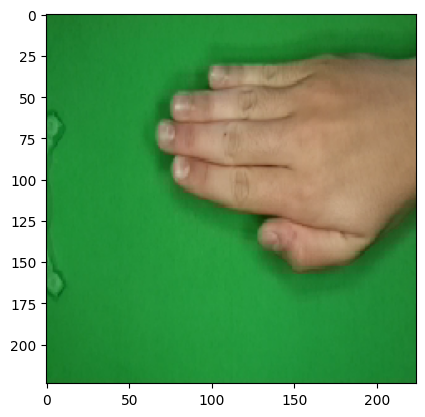

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Paper
Lq77eAG8OPaizwEd.png


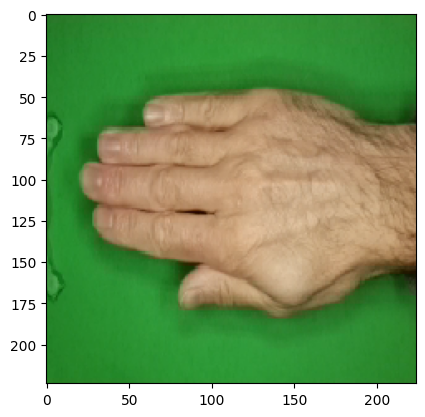

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Paper
Arbkrts1pXpDNgFV.png


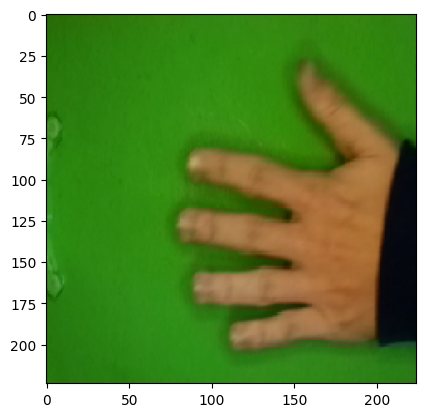

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Paper
JsrOSaR3txTRu3I9.png


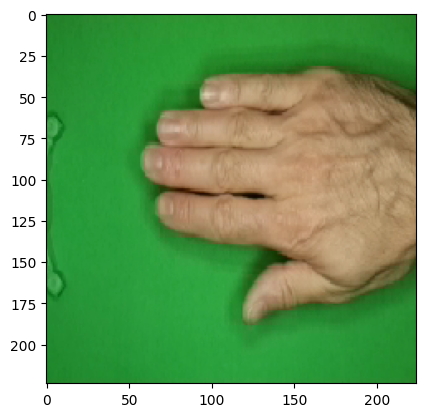

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Paper
NnWvTxntBJ5mFY73.png


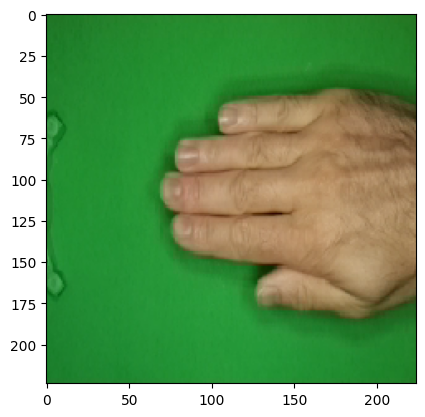

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Paper
H8cGdqeAOdIyIMO5.png


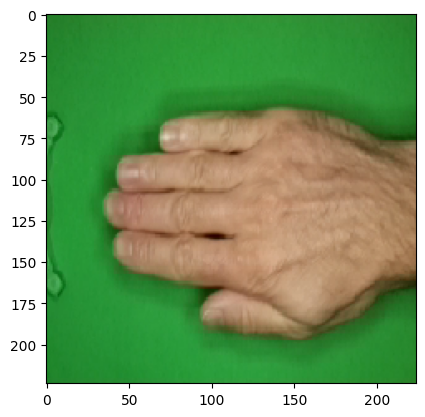

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Paper
VstDOeRm7czrAOO9.png


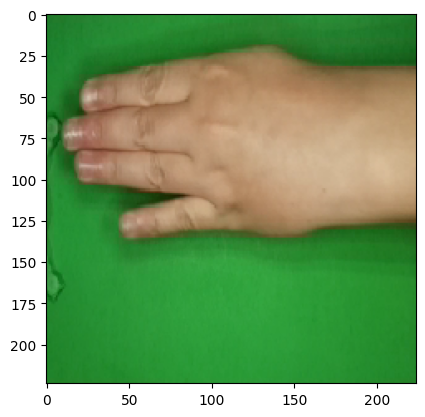

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Scissors
0Uomd0HvOB33m47I.png


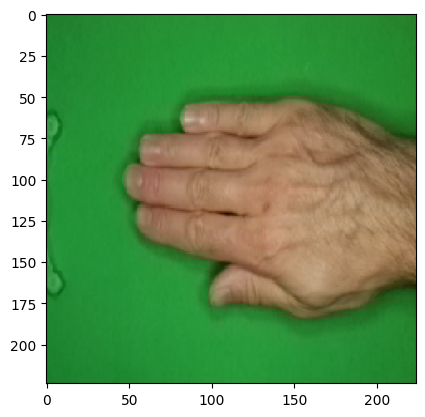

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Paper
Z5ioSnqxnoCUixRW.png


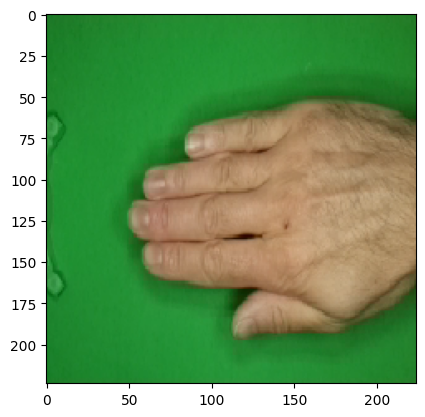

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Paper
PaZSkEO4jbBp3Hz7.png


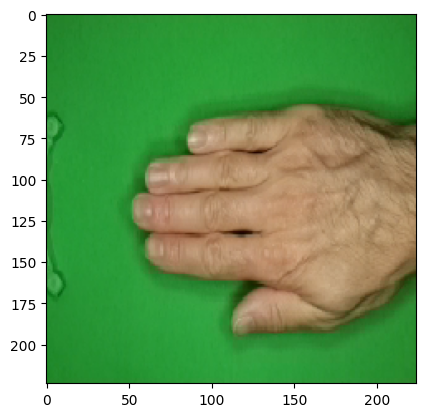

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Paper
MnvVVMoqDmzrm5NJ.png


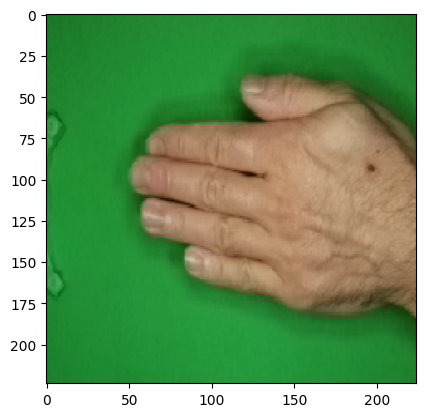

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Paper
yPnREvUeAGYRKi7V.png


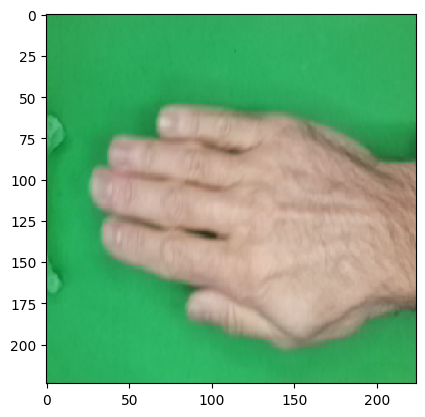

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Paper
vfKiFjWIK9JKHxLn.png


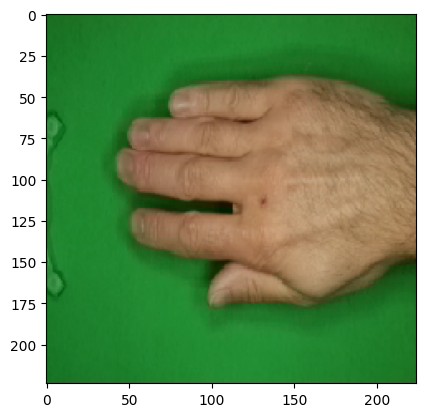

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Paper
sZyZICXHv0ArIZFw.png


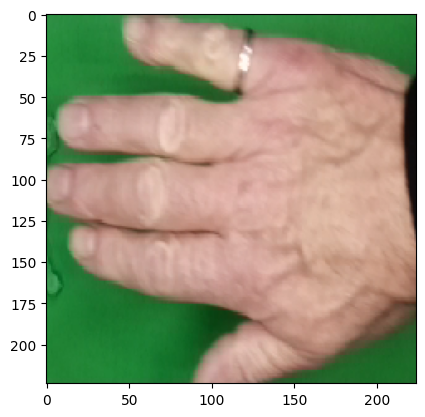

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Paper
m4BUXxtLrhnsSUJ2.png


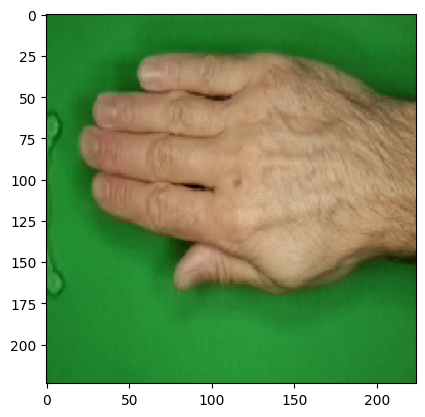

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Paper
N3RjXoHuCkTs2Prd.png


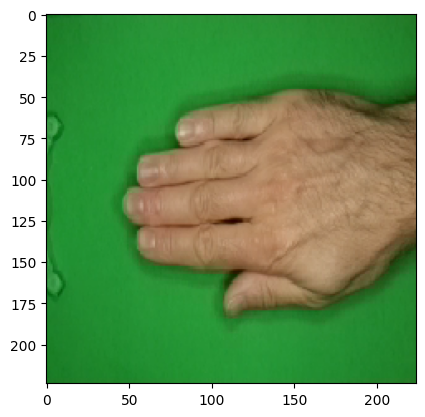

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Paper
ZBA0HPVlxkCdle5v.png


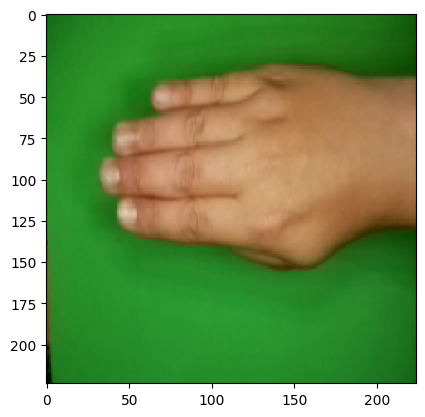

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Paper
4Fxr7klOIfijCpio.png


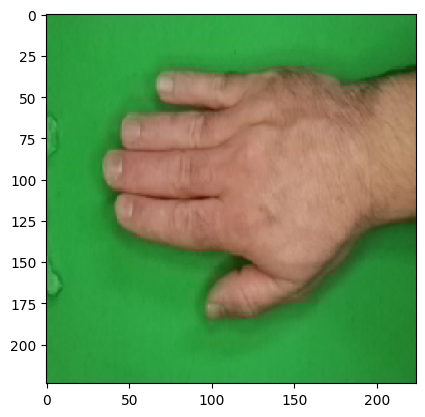

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Paper
qjNwQMtSzoZKXOGe.png


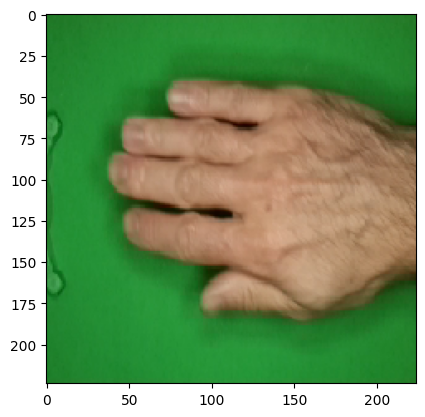

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Paper
EJ7cNnnea5yCEaOd.png


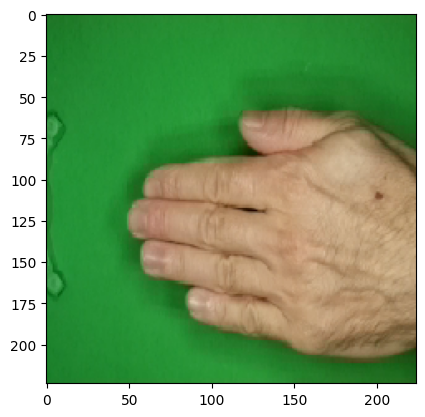

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Paper
ac0j8jCfz8hwpY0o.png


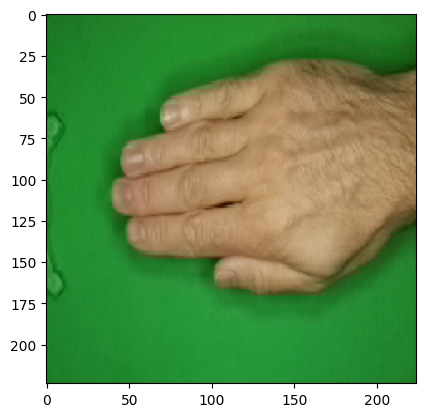

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Paper
9zuFLFklb0ibEelE.png


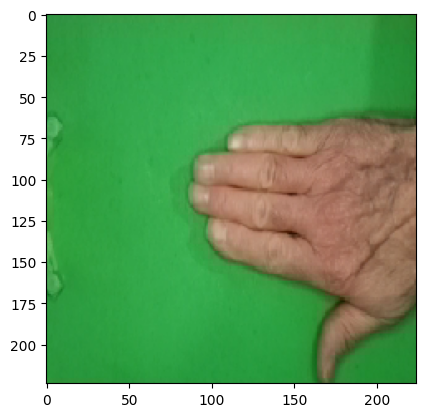

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Paper
djVVgBL6PqTdtr6l.png


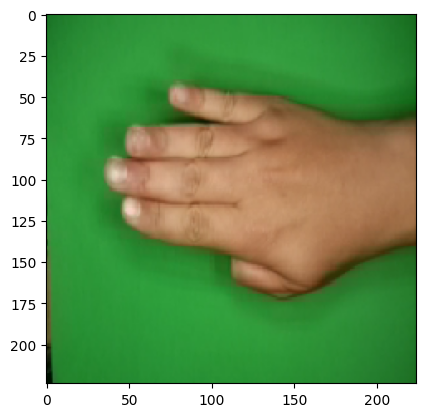

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Paper
yhXsHSeStA2dharc.png


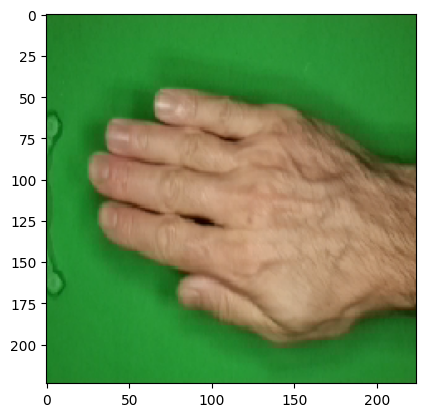

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Paper
LEA78quc0fi2hq9W.png


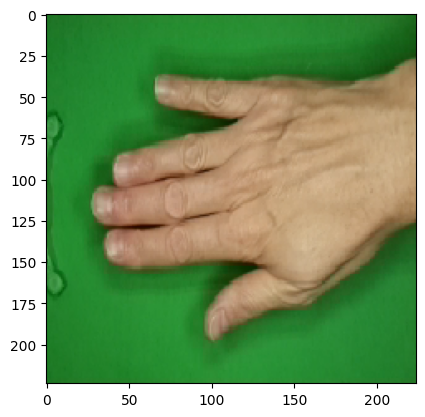

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Paper
hH7jcOkAiHqNDWcy.png


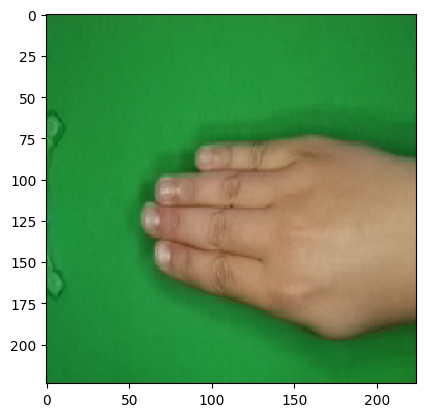

In [ ]:
i=0
print(curr_path_img)

curr_path_img_test = curr_path_img + "/datasets/test/paper"

for img in os.listdir(curr_path_img_test):
    print(img)
    img=image.load_img(curr_path_img_test+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        category="Paper"
    elif pred[0][1]>0.5:
        category="Rock"
    elif pred[0][2]>0.5:
        category="Scissors"
        
    print(category)   